**Imports and initial setup**

In [1]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 14.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=b04811fea129ba5b8d4411171d7354d6ddccacdeed16eedea7bd0a3ca3ecc9ea
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [2]:
!pip install --upgrade spacy

     |████████████████████████████████| 6.0 MB 11.2 MB/s 
     |████████████████████████████████| 181 kB 53.9 MB/s 
     |████████████████████████████████| 10.1 MB 44.9 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 653 kB 69.5 MB/s 
     |████████████████████████████████| 457 kB 61.2 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4

In [ ]:
!pip install spacytextblob
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
     |████████████████████████████████| 13.9 MB 14.4 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
Y

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import nltk
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import preprocess_string, strip_multiple_whitespaces, strip_tags, strip_punctuation, remove_stopwords
from gensim.models import CoherenceModel
from gensim.models import Phrases
from gensim.models import TfidfModel
from gensim.models.phrases import Phraser

import pyLDAvis
import pyLDAvis.gensim_models 
import matplotlib.pyplot as plt

import spacy

import warnings
warnings.filterwarnings('ignore')

# MOVIE_FILE = "IMDb_TLJ_Reviews.csv"
#MOVIE_FILE = "/content/drive/My Drive/MS/NLP_Final_project/IMDb_TMR_Reviews.csv"
MOVIE_FILE = "/content/drive/My Drive/MS/NLP_Final_project/IMDb_TSR_Reviews.csv"
#NEGATIVE_THRESHOLD = 4.0

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [5]:
df = pd.read_csv(MOVIE_FILE, index_col=0)
print(df.tail())
print(df.info())

                                                 Reviews  Scores
10081  It's only the best movie ever. If anyone hasn'...    10.0
10082  This is not a depressing movie, it's about hop...     9.0
10083  Hmm..see other reviews and this give me wish f...     NaN
10084  I have never seen such an amazing film since I...    10.0
10085  Beautifully poised. Sad but positive. Cinemato...     6.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10086 entries, 0 to 10085
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Reviews  10086 non-null  object 
 1   Scores   9522 non-null   float64
dtypes: float64(1), object(1)
memory usage: 236.4+ KB
None


In [6]:
# collecting all reviews in a list
data = df.Reviews.values.tolist()



In [7]:
print(data[0])
print(len(data))

Why do I want to write the 234th comment on The Shawshank Redemption? I am not sure - almost everything that could be possibly said about it has been said. But like so many other people who wrote comments, I was and am profoundly moved by this simple and eloquent depiction of hope and friendship and redemption. The only other movie I have ever seen that effects me as strongly is To Kill a Mockingbird. Both movies leave me feeling cleaner for having watched them.I didn't intend to see this movie at all: I do not like prison movies and I don't normally watch them. I work at a branch library and one day as I was checking The Shawshank Redemption out to one of our older patrons, she said to me, "Whenever I feel down or depressed, I check out this movie and watch it and it always makes me feel better." At the time, I thought that was very strange. One day there was nothing on TV except things I absolutely would not watch under any circumstance or things that I had seen too many times alread

In [9]:
!pip install spacytextblob
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
     |████████████████████████████████| 13.9 MB 14.9 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
Y

In [10]:
from re import IGNORECASE
# preprocessing review data
N_GRAM_THRESHOLD = 500
CUSTOM_FILTERS = [lambda x: x.lower(), strip_punctuation, remove_stopwords, strip_multiple_whitespaces]
ALLOWED_POSTAGS = ['NOUN', 'ADJ',] # 'VERB', 'ADV'
IGNORE_WORDS = ["matrix", "t",  "shawshank", "redemption",'movie','film','time','thing','watch','scene','story','good','great','actor']

pdata = [preprocess_string(str(review), filters=CUSTOM_FILTERS) for review in data] 

# sample result
print(f"Raw: {data[0]}")
print(f"Preprocessed: {pdata[0]}")

bigram = Phrases(pdata, min_count=10, threshold=N_GRAM_THRESHOLD) 
trigram = Phrases(bigram[pdata], min_count=10, threshold=N_GRAM_THRESHOLD)  

# export bigram and trigram models. They cannot be updated after this step
bigram_model = Phraser(bigram)
trigram_model = Phraser(trigram)

# sample result
def display_n_gram(review, n=2):
  n_grams = list()

  if n == 2:
    review = bigram_model[review]
  if n == 3:
    review = trigram_model[bigram_model[review]]
    
  for word in review:
    if word.count("_") == n-1:
      n_grams.append(word)
  return n_grams

print(f"Bigram in first review: {display_n_gram(pdata[0], 2)}")
print(f"Trigram in first review: {display_n_gram(pdata[0], 3)}")

pdata_bigrams = [bigram_model[review] for review in pdata]
pdata_trigrams = [trigram_model[bigram_model[review]] for review in pdata]

def lemmatization(texts, allowed_postags):
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) # load only the tagger tokenizer
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        tokenized_sent = [token.lemma_ for token in doc if token.pos_ in allowed_postags]
        tokenized_sent = [token for token in tokenized_sent if token not in IGNORE_WORDS] 
        texts_out.append(tokenized_sent)
    return texts_out

pdata_lemmatized = lemmatization(pdata_bigrams,allowed_postags=ALLOWED_POSTAGS)
print(f"Lemmatized review: {pdata_lemmatized[0]}")




Raw: Why do I want to write the 234th comment on The Shawshank Redemption? I am not sure - almost everything that could be possibly said about it has been said. But like so many other people who wrote comments, I was and am profoundly moved by this simple and eloquent depiction of hope and friendship and redemption. The only other movie I have ever seen that effects me as strongly is To Kill a Mockingbird. Both movies leave me feeling cleaner for having watched them.I didn't intend to see this movie at all: I do not like prison movies and I don't normally watch them. I work at a branch library and one day as I was checking The Shawshank Redemption out to one of our older patrons, she said to me, "Whenever I feel down or depressed, I check out this movie and watch it and it always makes me feel better." At the time, I thought that was very strange. One day there was nothing on TV except things I absolutely would not watch under any circumstance or things that I had seen too many times a

**Frequency distribution of tokens in all reviews**

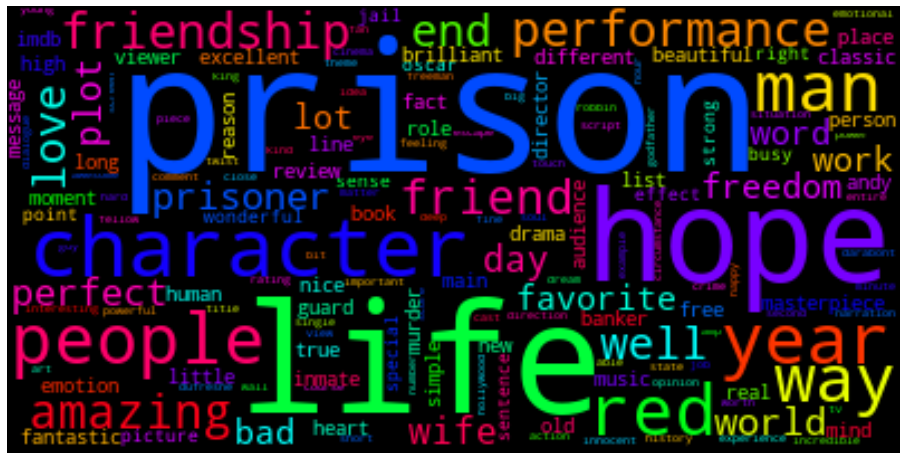

In [11]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = [item for sublist in pdata_lemmatized for item in sublist]
dictionary=Counter(all_words)
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## NMF for topic modelling

In [12]:
from sklearn.feature_extraction.text import  TfidfVectorizer

Pre-Precoessing fo data for NMF

In [13]:
# tfidf_model = TfidfModel(corpus, normalize=True)
# tfidf_corpus = [tfidf_model[corpus[i]] for i in range(len(corpus))]
print(data[0])
print(pdata_lemmatized[0])
# print(id2word[0])
# print(id2word[1])
# print(corpus[0])
#print(tfidf_corpus[0])


Why do I want to write the 234th comment on The Shawshank Redemption? I am not sure - almost everything that could be possibly said about it has been said. But like so many other people who wrote comments, I was and am profoundly moved by this simple and eloquent depiction of hope and friendship and redemption. The only other movie I have ever seen that effects me as strongly is To Kill a Mockingbird. Both movies leave me feeling cleaner for having watched them.I didn't intend to see this movie at all: I do not like prison movies and I don't normally watch them. I work at a branch library and one day as I was checking The Shawshank Redemption out to one of our older patrons, she said to me, "Whenever I feel down or depressed, I check out this movie and watch it and it always makes me feel better." At the time, I thought that was very strange. One day there was nothing on TV except things I absolutely would not watch under any circumstance or things that I had seen too many times alread

In [14]:
cleaned_moview_reviews_list = []
for each_review in range(len(pdata_lemmatized)):
  sentence = " ".join(pdata_lemmatized[each_review])
  cleaned_moview_reviews_list.append(sentence)





In [15]:
print(cleaned_moview_reviews_list[0])

write_234th comment people wrote_comment simple eloquent_depiction hope friendship effect prison work day older_patron depressed_check well strange day tv circumstance well action special effect man prison judge care godfather technique_influential motion_picture one touch soul touch soul


In [16]:
cleaned_moview_reviews_corpus = []
for i in range(len(cleaned_moview_reviews_list)):
  tokens = cleaned_moview_reviews_list[i].split()
  cleaned_moview_reviews_corpus.append(tokens)



In [17]:
print(cleaned_moview_reviews_corpus[0])

['write_234th', 'comment', 'people', 'wrote_comment', 'simple', 'eloquent_depiction', 'hope', 'friendship', 'effect', 'prison', 'work', 'day', 'older_patron', 'depressed_check', 'well', 'strange', 'day', 'tv', 'circumstance', 'well', 'action', 'special', 'effect', 'man', 'prison', 'judge', 'care', 'godfather', 'technique_influential', 'motion_picture', 'one', 'touch', 'soul', 'touch', 'soul']


In [18]:
# Create Dictionary
id2word = corpora.Dictionary(cleaned_moview_reviews_corpus) # word to ID mapping

# Term Document Frequency - Bag of words
corpus = [id2word.doc2bow(review) for review in cleaned_moview_reviews_corpus] #  list of (token_id, token_count)

print("Bag of words for first review:")
for token_id, token_count in corpus[0]:
  print(f"{id2word[token_id]}: {token_count}")

Bag of words for first review:
action: 1
care: 1
circumstance: 1
comment: 1
day: 2
depressed_check: 1
effect: 2
eloquent_depiction: 1
friendship: 1
godfather: 1
hope: 1
judge: 1
man: 1
motion_picture: 1
older_patron: 1
one: 1
people: 1
prison: 2
simple: 1
soul: 2
special: 1
strange: 1
technique_influential: 1
touch: 2
tv: 1
well: 2
work: 1
write_234th: 1
wrote_comment: 1


In [19]:
feature_names = []
for i in range(len(id2word)):
  print(id2word[i])
  feature_names.append(id2word[i])

#print(feature_names)

Streaming output truncated to the last 5000 lines.
wizardry
cinematographya1
aversion
stitched
haunted
mom
tissue
yer
writting
torrid
anxious
exclamation
bolt
millionaire
negativity
ohio
polar
scandel
stinkin
tug
hysteria
la
heard
stranger
frailty
baddass
wvas
blowing
minf
laloosh
prostrate
buzsaw
contribute
e_g
destination
engaging
pessimism
reject
powerle
sided
antidote
whitehouse
bean
boo
flexible
fraudulent
hutz
inadequate
memorize
memorizing
peal
peek
penchant
priest
scare
spill
stormy
suspicion
unlikelyin
temptation
realisation
conveying
summarising
contractor
coolness
employer
illustration
indicator
leasing
playback
sol
tolerance
disillusionment
lightning
phonographs
helpless
contain
scipt
untill
reliance
widespread
quintessence
reminiscence
listo
layering
snippets_individuality
sustenance
aspirational
cleanse
colossal
democracy
holder
korean
miniature
pessimist
regime
reintegrated
unworthy
masterpeice
dorm
nuts
rack
bull_queer
oppurtunity
scandalous
teaser
virtualy
coldness
che

In [20]:
# TFIDF for NMF
# N-grams
ngrams = (1,1)

# Preprocess with TF-IDF
tfidf = TfidfVectorizer(ngram_range=ngrams)
nmf_tfidf = tfidf.fit_transform(cleaned_moview_reviews_list)


**NMF using TFIDF**

In [21]:
from sklearn.decomposition import NMF
import time
from pprint import pprint

#n_topics = 5
n_components = 10 #n_topics
def display_topics(model, feature_names, no_top_words, topic_names=None):
    topic_list = []
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            topics = "Topic: " + str(ix)
        else:
            topics = "Topic:'" + str(topic_names[ix])
        terms = ", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])
        topic_list.append((topics, terms))
    return topic_list

nmf_model = NMF(n_components=n_components, random_state=42)

start = time.time()
doc_topic = nmf_model.fit_transform(nmf_tfidf)
end = time.time()

nmf_topics = display_topics(nmf_model, tfidf.get_feature_names(), 20)
pprint(nmf_topics)
print("Model Execution Time:", end-start)

[('Topic: 0',
  'prison, red, man, wife, prisoner, inmate, murder, banker, friend, sentence, '
  'andy, guard, fellow, friendship, state, wall, innocent, year, crime, '
  'escape'),
 ('Topic: 1',
  'amazing, cast, recommend, plot, word, job, emotional, piece, beautiful, '
  'direction, awesome, work, brilliant, screen, storyline, incredible, '
  'character, star, end, hardships_hope'),
 ('Topic: 2',
  'love, favorite, wonderful, awesome, drama, friend, history, fun, hard, '
  'family, fall, action, inspiration, jail, word, right, feeling, job, '
  'similar, honest'),
 ('Topic: 3',
  'perfect, performance, word, line, cast, well, twist, rate, knocked_chair, '
  'screenplay, clancy_brown, memorable, rent, surprising, bet, brook, power, '
  'guard, character, end'),
 ('Topic: 4',
  'well, effect, day, touch, soul, wrote_comment, eloquent_depiction, '
  'older_patron, depressed_check, comment, write_234th, simple, strange, tv, '
  'people, work, technique_influential, motion_picture, godfa

In [22]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

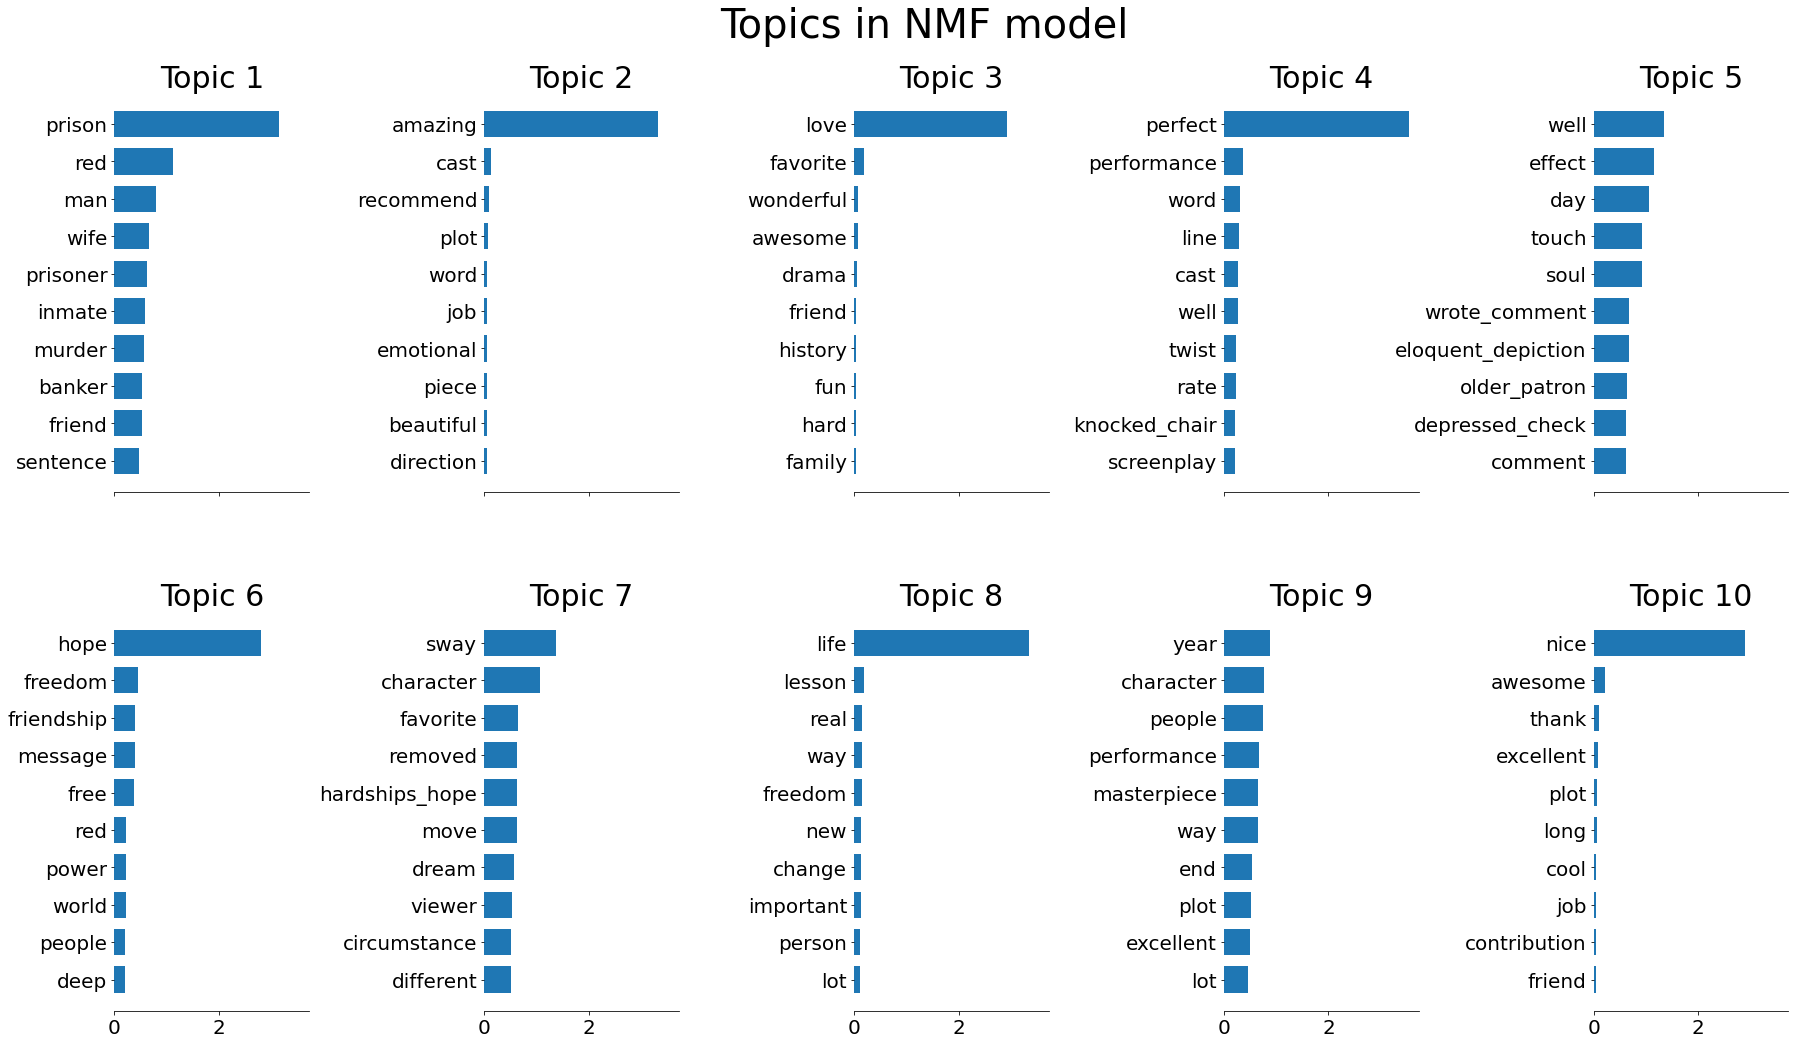

['086th' '0ut' '10' ... 'ótima' 'özgürlügün' 'überraschenden']


In [23]:
tfidf_feature_names = tfidf.get_feature_names_out()
plot_top_words(
    nmf_model,
    tfidf_feature_names,
    10,
    "Topics in NMF model",
)

print(tfidf_feature_names)

In [1]:
# Compute Coherence Score
coherence_model_nmf_tfidf = CoherenceModel(model=nmf_model, texts=cleaned_moview_reviews_corpus, dictionary=id2word, coherence='c_v')
coherence_nmf_tfidf = coherence_model_nmf_tfidf.get_coherence()
print('\nCoherence Score: ', coherence_nmf_tfidf)

In [25]:
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(lda_model_s15, corpus, id2word)

# pyLDAvis.save_html(vis, 'lda_shawshank_15_topics.html')
# vis


# # *************************

# import pyLDAvis.sklearn
# num_topics = n_components
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.sklearn.prepare(nmf_model, corpus, feature_names)
# pyLDAvis.save_html(vis, 'nmf_shawshank_10_topics_tfidf.html')
# vis

**NMF using BOW**

In [ ]:
!pip install --upgrade gensim

In [26]:
!python -m pip install -U gensim


     |████████████████████████████████| 24.1 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [28]:

#from gensim.models.nmf import Nmf
from gensim.models import Nmf
nmf_model_bow = Nmf(corpus, num_topics=15, kappa=0.1, eval_every=1, chunksize=1000, id2word=id2word)
# topics = nmf_model.print_topics()
nmf_model_bow.print_topics()

In [29]:
#!python -m pip install -U gensim